In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

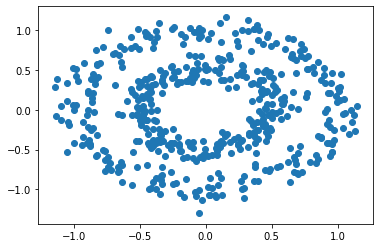

In [2]:
n  = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.09)

Y = Y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
Y.shape

(500, 1)

In [4]:
class capa_nerunal():
    def __init__(self, conexiones, neuronas, activacion):
        self.activacion = activacion
        self.arranque = np.random.rand(1, neuronas) * 2 -1
        """
        genera numero random de 0 a 1, 
        mult por 2 para que fluctue de 0 a 2, y
        resta uno para que fluctue de -1 a 1
        """
        self.peso = np.random.rand(conexiones, neuronas) * 2 -1
    


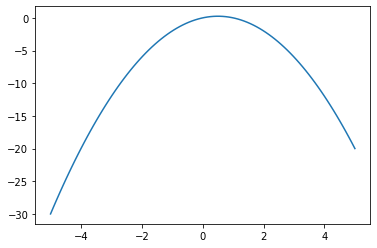

In [5]:
sigmoide = lambda x: 1 /(1 + np.e ** (-x)), lambda x: x * (1 - x)# sigmoide , derivada

relu = lambda x: np.maximum (0, x)

_x = np.linspace(-5, 5, 100)
            
plt.plot(_x, sigmoide[1](_x))


In [6]:
capa0 = capa_nerunal(p, 4, sigmoide)
capa1 = capa_nerunal(4, 8, sigmoide)


def crear_capa(estructura, activacion):
    
    nn = []
    
    for C, capas in enumerate(estructura[:-1]):
    
        nn.append(capa_nerunal(estructura[C], estructura[C+1], activacion))
        
        
    return nn
        


In [7]:
estructura = [p, 4, 8, 1]

red_neuronal = crear_capa(estructura, sigmoide)

coste = (lambda prediccion, real: np.mean((prediccion - real) ** 2), lambda prediccion, real: (prediccion - real))
#calculo del error cuadratico medio y su derivada#

def entrenador(red_neuronal, X, Y, coste, lr=0.5, train=True):
    
    salida = [(None, X)]
    
    for C, capas in enumerate(red_neuronal):
        
    
        ponderada = salida[-1][1] @ red_neuronal[C].peso + red_neuronal[C].arranque
    
        activ = red_neuronal[C].activacion[0](ponderada)
        
        
        salida.append((ponderada, activ))
        
       
    if train:
        
        deltas = []
        
        for C in reversed(range (0, len(red_neuronal))):
            
            ponderada = salida[C+1][0]
            activ = salida[C+1][1]
            
            
            if C == len(red_neuronal) - 1: #ultima capa#
                deltas.insert(0, coste[1](activ, Y) * red_neuronal[C].activacion[1](activ)) #error de ultima capa#
            else:
                deltas.insert(0, deltas[0] @ _peso.T * red_neuronal[C].activacion[1](activ))
                
                
            _peso = red_neuronal[C].peso
            
        
            red_neuronal[C].arranque = red_neuronal[C].arranque - np.mean(deltas[0], axis=0, keepdims=True) * lr
            
            
            red_neuronal[C].peso = red_neuronal[C].peso - salida[C][1].T @ deltas[0] * lr
            
    return salida[-1][1]
                
                
            
          
            
        
entrenador(red_neuronal, X, Y, coste, 0.5)



array([[0.77590292],
       [0.75670727],
       [0.78261944],
       [0.78037662],
       [0.77588502],
       [0.76183648],
       [0.77723668],
       [0.77843251],
       [0.77246333],
       [0.77055837],
       [0.77450875],
       [0.76390976],
       [0.77306248],
       [0.76932244],
       [0.75071689],
       [0.76637006],
       [0.77429117],
       [0.77207725],
       [0.7833305 ],
       [0.76320975],
       [0.78267949],
       [0.76926443],
       [0.76231838],
       [0.77184481],
       [0.78151367],
       [0.7560147 ],
       [0.76319529],
       [0.76246524],
       [0.77800626],
       [0.77234937],
       [0.7627139 ],
       [0.77043138],
       [0.76409366],
       [0.77651917],
       [0.77397903],
       [0.77966113],
       [0.76510636],
       [0.77616715],
       [0.78074798],
       [0.77534331],
       [0.76927263],
       [0.77273861],
       [0.76349717],
       [0.76396173],
       [0.77220271],
       [0.75543843],
       [0.77337684],
       [0.779

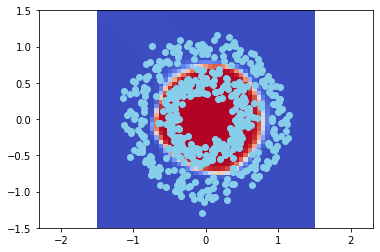

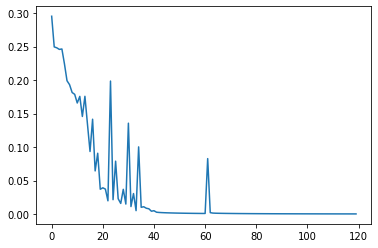

[0.29533826570589, 0.2495795237699308, 0.24822636045120552, 0.24585924972182552, 0.24646694323008858, 0.22420874360262844, 0.19907228181797748, 0.19318891250048978, 0.18152753207710612, 0.1787821171188912, 0.1658769374593366, 0.17572563912443678, 0.1457564209253845, 0.17584843464535446, 0.13407271256837328, 0.09347942405064873, 0.14164661975898382, 0.06450112464003055, 0.09087459113319918, 0.03713142543634989, 0.03930328835881722, 0.037383739886563204, 0.01985906821637502, 0.1986100020026281, 0.021563499127729414, 0.07903303308369498, 0.022990690384554095, 0.015969047881705774, 0.03700111056799986, 0.015013308826087186, 0.13572785061163595, 0.011269158283407247, 0.03070710797901714, 0.005198074944020005, 0.10036116413794936, 0.01020526638536841, 0.011007088157334291, 0.008796534824195169, 0.0079615632813411, 0.004344523779805961, 0.005088547389927214, 0.002865953981871728, 0.0024990355916107393, 0.0022740940728488354, 0.0021038229440139868, 0.0019629040587855456, 0.0018411923110769849,

In [8]:
import time
from IPython.display import clear_output

neural_n = crear_capa(estructura, sigmoide)

loss = []


for l in range(3000):
        
        pY = entrenador(neural_n, X, Y, coste, lr=0.1)
        
        if l % 25 == 0:
            
            loss.append(coste[0](pY, Y))
            
            res = 50
            
            _x0 = np.linspace(-1.5, 1.5, res)
            _x1 = np.linspace(-1.5, 1.5, res)
            
            
            _Y = np.zeros((res, res))
            
            for l0, x0 in enumerate (_x0):
                for l1, x1 in enumerate(_x1):
                    _Y[l0, l1] = entrenador(neural_n, np.array([[x0, x1]]), Y, coste, train=False)[0][0]
                    
                    
            plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
            plt.axis("equal")
            
            plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
            plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="skyblue")
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)), loss)
            plt.show()
            time.sleep(0.3)
            print(loss)
            print(len(loss))
            